In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
data.shape

(7043, 21)

In [7]:
data=data.drop(['customerID','MultipleLines'],axis=1)

<AxesSubplot:xlabel='gender', ylabel='count'>

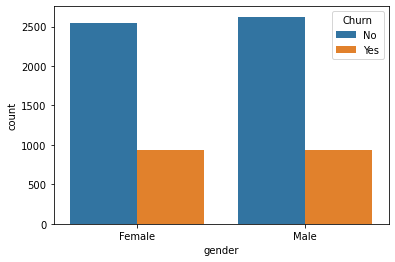

In [8]:
sns.countplot(x='gender',hue='Churn',data=data)

In [9]:
data['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

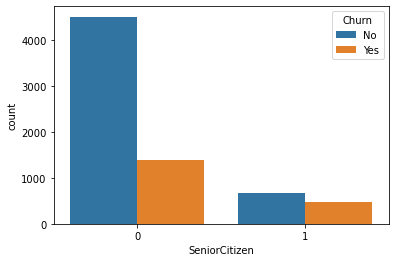

In [10]:
sns.countplot(x='SeniorCitizen',hue='Churn',data=data)

In [11]:
data['Partner']=data['Partner'].replace(['Yes','No'],[1,0])
data['Dependents']=data['Dependents'].replace(['Yes','No'],[1,0])

<AxesSubplot:xlabel='Partner', ylabel='count'>

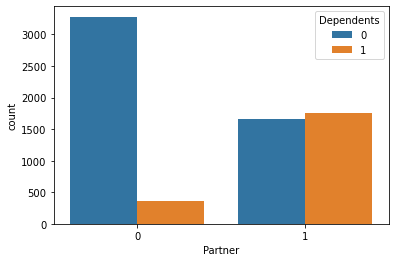

In [12]:
sns.countplot(x='Partner',hue='Dependents',data=data)

In [13]:
data['PhoneService']=data['PhoneService'].replace(['Yes','No'],[1,0])
data['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

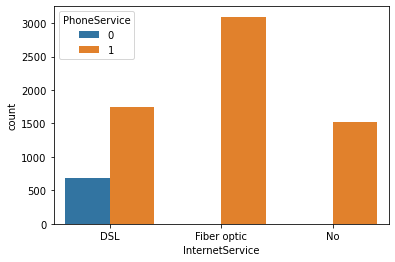

In [14]:
sns.countplot(x='InternetService',hue='PhoneService',data=data)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


In [16]:
print(data['OnlineSecurity'].unique())
print(data['OnlineBackup'].unique())

['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']


In [17]:
data['OnlineSecurity']=data['OnlineSecurity'].replace(['Yes','No','No internet service'],[1,0,-1])
data['OnlineSecurity'].unique()

array([ 0,  1, -1], dtype=int64)

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

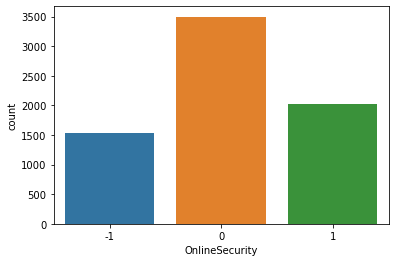

In [18]:
sns.countplot(x='OnlineSecurity',data=data)

In [19]:
data['OnlineBackup']=data['OnlineBackup'].replace(['Yes','No','No internet service'],[1,0,-1])
data['OnlineBackup'].unique()

array([ 1,  0, -1], dtype=int64)

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

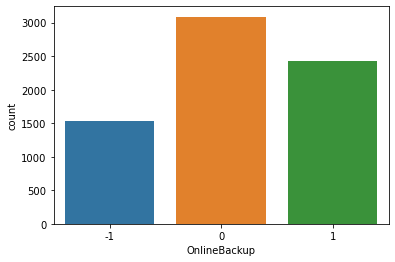

In [20]:
sns.countplot(x='OnlineBackup',data=data)

In [21]:
data['OnlineBackup']=data['OnlineBackup'].replace(['Yes','No','No internet service'],[1,0,-1])
data['OnlineBackup'].unique()

array([ 1,  0, -1], dtype=int64)

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

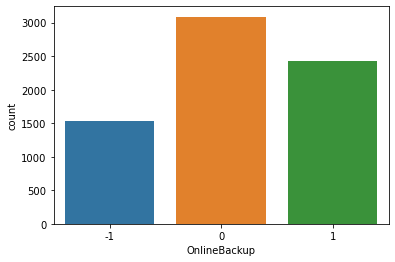

In [22]:
sns.countplot(x='OnlineBackup',data=data)

In [23]:
data['OnlineBackup']=data['OnlineBackup'].replace(['Yes','No','No internet service'],[1,0,-1])
data['OnlineBackup'].unique()

array([ 1,  0, -1], dtype=int64)

In [24]:
data['DeviceProtection']=data['DeviceProtection'].replace(['Yes','No','No internet service'],[1,0,-1])
data['DeviceProtection'].unique()

array([ 0,  1, -1], dtype=int64)

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

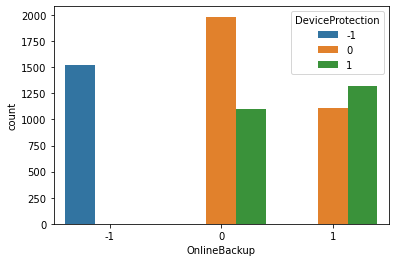

In [25]:
sns.countplot(x='OnlineBackup',hue='DeviceProtection',data=data)

In [26]:
data['StreamingTV']=data['StreamingTV'].replace(['Yes','No','No internet service'],[1,0,-1])
data['StreamingTV'].unique()

array([ 0,  1, -1], dtype=int64)

In [27]:
data['StreamingMovies']=data['StreamingMovies'].replace(['Yes','No','No internet service'],[1,0,-1])
data['StreamingMovies'].unique()

array([ 0,  1, -1], dtype=int64)

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

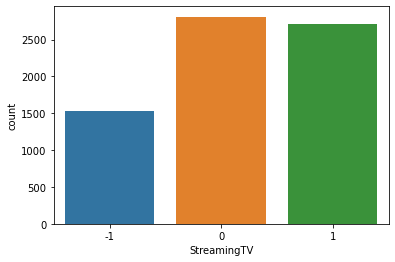

In [28]:
sns.countplot(x='StreamingTV',data=data)

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

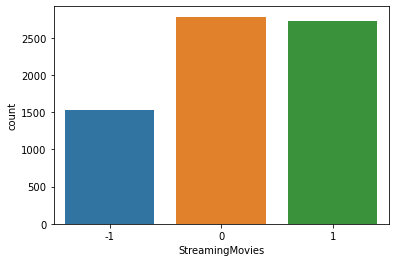

In [29]:
sns.countplot(x='StreamingMovies',data=data)

In [30]:
data['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [31]:
data['Contract']=data['Contract'].replace(['Month-to-month','One year','Two year'],[0,1,2])
data['Contract'].unique()

array([0, 1, 2], dtype=int64)

<AxesSubplot:xlabel='Contract', ylabel='count'>

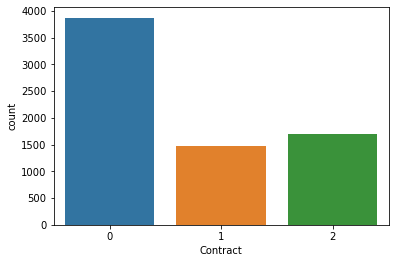

In [32]:
sns.countplot(x='Contract',data=data)

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

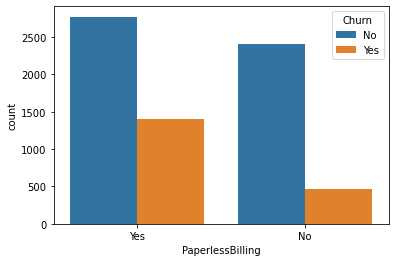

In [33]:
sns.countplot(x='PaperlessBilling',hue='Churn',data=data)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   int64  
 8   OnlineBackup      7043 non-null   int64  
 9   DeviceProtection  7043 non-null   int64  
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   int64  
 12  StreamingMovies   7043 non-null   int64  
 13  Contract          7043 non-null   int64  
 14  PaperlessBilling  7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


In [35]:
train,test=train_test_split(data,test_size=0.2)

In [36]:
train.shape

(5634, 19)

In [37]:
test.shape

(1409, 19)

In [38]:
train_x=data[['SeniorCitizen','Partner','Dependents','tenure','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies','Contract','MonthlyCharges']]
train_y=data[['Churn']]

test_x=data[['SeniorCitizen','Partner','Dependents','tenure','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies','Contract','MonthlyCharges']]
test_y=data[['Churn']]

In [39]:
tree=DecisionTreeClassifier()
tree.fit(train_x,train_y)
predct=tree.predict(test_x)
metrics.accuracy_score(test_y,predct)

0.9910549481754934

In [40]:
RFR=RandomForestClassifier()
RFR.fit(train_x,train_y)
predct=RFR.predict(test_x)
metrics.accuracy_score(test_y,predct)

0.9910549481754934

In [41]:
vector=SVC()
vector.fit(train_x,train_y)
predct=vector.predict(test_x)
metrics.accuracy_score(test_y,predct)

0.7878744853045577

In [42]:
KNC=KNeighborsClassifier()
KNC.fit(train_x,train_y)
predct=KNC.predict(test_x)
metrics.accuracy_score(test_y,predct)

0.840976856453216

In [43]:
gauss=GaussianNB()
gauss.fit(train_x,train_y)
predct=gauss.predict(test_x)
metrics.accuracy_score(test_y,predct)

0.7282408064745137